# Projeto 2 - MC886

## Alunos: 
&emsp;&emsp;&emsp;&emsp;Felipe Escórcio de Sousa - RA:171043\
&emsp;&emsp;&emsp;&emsp;Miguel Augusto S Guida&nbsp;&nbsp;&nbsp;- RA:174847

## Objetivo
&emsp;Este projeto tem como objetivo aplicar métodos de aprendizado para resolver tarefas de regressão e classificação. O projeto será dividido em duas partes:
<li>
    <ul>Parte 1: Tarefa de Regressão</ul>
    <ul>Parte 2: Tarefa de Classificação</ul>
</li>

## Parte 1 - Tarefa de Regressão
&emsp;Considerando que somos um robô goleiro em uma partida de futebol de robôs, recebemos o início de duas trajetórias de chutes diferentes, e vamos analisar se somos capazes de prever a trajetória completa da bola e também se conseguimos defender o chute.\
&emsp;\
&emsp;Esta tarefa consiste em implementar uma regressão linear e uma regressão polinomial, e analisar quais modelos são melhores em prever a trajetória dos chutes.



## Implementação Regressão Linear
&emsp;Some text

### Imports
&emsp;Utilizaremos as bibliotecas **blablabla**

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

### Importação dos datasets

In [58]:
def import_dataset(filename):
    with open(filename) as binary_file:
        data = []
        x = []
        y = []
        z = []
        for d in binary_file:
            string = d.split()
            x.append(float(string[0]))
            y.append(float(string[1]))
            z.append(float(string[2]))
            
    array = np.ndarray(shape=(len(x), 3), dtype=float)

    for i in range(len(x)):
        array[i][0] = x[i]
        array[i][1] = y[i]
        array[i][2] = z[i]

    return array

### Modelo h_theta

In [59]:
def calc_h(W, X):
    m = X.shape[0]
    h = np.dot(W[0,1:],X.T).reshape((m, 1))+W[0,0]
    return h

### Função de custo

In [60]:
def cost(h, Y):
    m = Y.shape[0]
    j = (1/(2*m))*np.sum((h-Y)**2)
    return j

### Função Gradiente Descendente

In [61]:
def gradient_desc(W,X,Y,m,n,learning_rate):
    h = calc_h(W,X)
    # print(h.shape)
    # print(h)
    j = cost(h, Y)
    print("cost: ",j)

    grads = {}
    grads["dw0"] = (1/m)*np.sum((h-Y))
    for i in range(1,n+1):
        grads["dw"+str(i)] = (1/m)*np.sum((h-Y)*X[:,i-1])
    # print(grads)
    for i in range(0,n+1):
        W[0,i] = W[0,i] - learning_rate*grads["dw"+str(i)]
    # print(W)
    return W,j


### Função de Regressão Linear

In [62]:
def regressaoLinear(X, Y, iterations, learning_rate, W_scale = 0.05):
    print(X.shape)
    n = X.shape[1]
    m = X.shape[0]

    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    costs = []
    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    plotGrafico(W,X,Y,costs,iterations)
    plotCosts(iterations, costs)

### Função para plotar gráfico 3D e Gráfico de Custo

In [63]:
def plotGrafico(W,X,Y,costs,iterations):
    h = calc_h(W, X)
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], Y[:]) 
    ax.scatter(X[:,0], X[:,1], h)

    i = 2
    y = 1.109 - 0.050
    x = -1.192 - 0.050
    z = 1.11  - 0.01
    predX1 = []
    predX2 = []
    predH = []
    while y > 0:
        y = 1.109 - i*0.050
        x = -1.192 - i*0.050
        z = 1.11  - i*0.01
        h = calc_h(W,np.asarray([[x, y]]))
        predX1.append(x)
        predX2.append(y)
        predH.append(h)
        i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()

def plotCosts(iterations, costs):
    fig = plt.figure()
    plt.plot(range(0,iterations),costs[:])
    plt.show()

### Chamada da função linear

(20, 2)
Init W:  [[0.0209793  0.01034643 0.00482656]]
cost:  0.09931727840575491
cost:  0.037185992641876456
cost:  0.015094061630957036
cost:  0.007280509318603382
cost:  0.004543641643515602
cost:  0.0036026882549614436
cost:  0.0032915534049128368
cost:  0.0031979563870957075
cost:  0.0031774567573296646
cost:  0.003180255753865109
cost:  0.003189678407924259
cost:  0.0032004493239349563
cost:  0.003211097419240085
cost:  0.003221346946811195
cost:  0.003231249900703635
cost:  0.0032409154004221065
cost:  0.0032504368525949597
cost:  0.0032598803217207457
cost:  0.0032692890444977474
cost:  0.003278690256934494
cost:  0.0032881007672288655
cost:  0.003297530829260226
cost:  0.0033069866569565218
cost:  0.0033164720013752675
cost:  0.0033259891216563236
cost:  0.0033355393765500483
cost:  0.0033451235826058275
cost:  0.0033547422302944714
cost:  0.003364395614136795
cost:  0.0033740839109567483
cost:  0.0033838072269039192
cost:  0.0033935656256968007
cost:  0.003403359145582033
cost

<IPython.core.display.Javascript object>


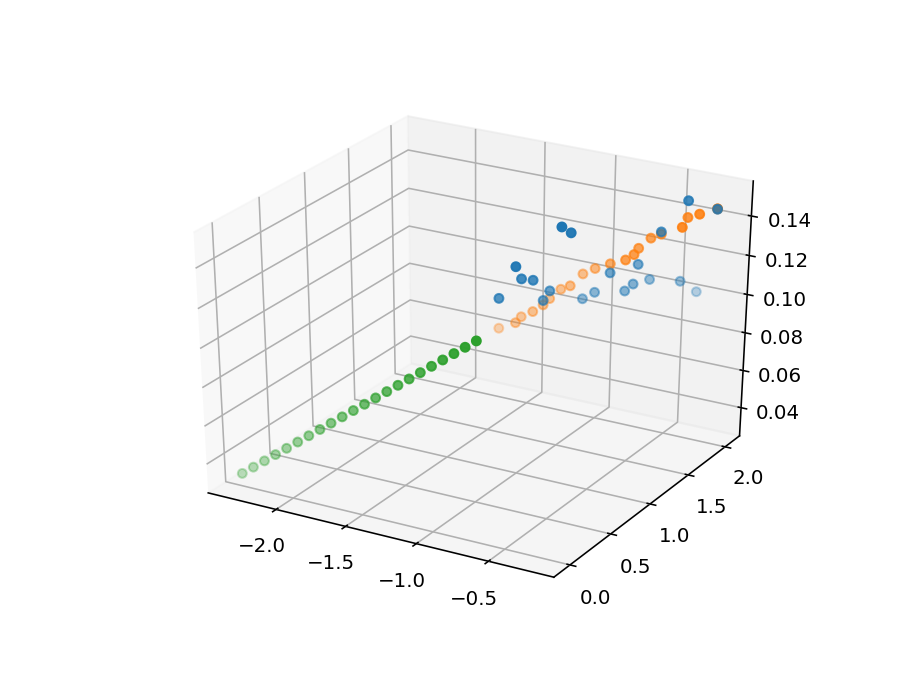

<IPython.core.display.Javascript object>


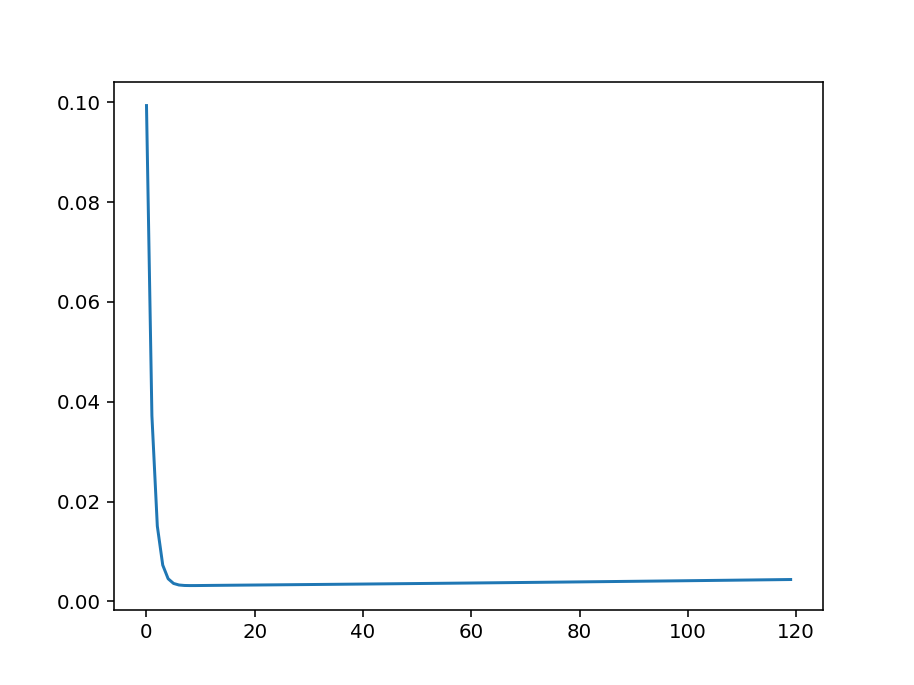

In [64]:
kick1 = import_dataset('kick1.dat')

learning_rate = 0.005
iterations = 120
W_scale = 0.05
regressaoLinear(kick1[:,:2], kick1[:,2], iterations, learning_rate, W_scale)

## Implementação Regressão Polinomial
&emsp;Usaremos as mesmas funções de h_theta, custo e gradiente utilizadas na regressão linear.\
&emsp;...

### Modelo Plotar Gráfico Polinomial

In [65]:
def plotRegression(W,X,Y,h,iterations,costs, X_original):
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_original[:,0], X_original[:,1], Y[:]) 
    ax.scatter(X_original[:,0], X_original[:,1], h) 

    i = 2
    y = 1.109 - 0.050
    x = -0.596 - 0.030
    z = 0.11  - 0.01
    predX1 = []
    predX2 = []
    predH = []
    while y > 0:
        y = 1.109 - i*0.050
        x = -0.596 - i*0.030
        x2 = x**2
        y2 = y **2
        z = 0.269  - i*0.02
        h = calc_h(W,np.asarray([[x, y, y2]]))
        predX1.append(x)
        predX2.append(y)

        predH.append(h)
        i+=1

    ax.scatter(predX1[:], predX2[:], predH[:]) 
    plt.show()


### Função para Regressão Polinomial

In [66]:
def regressaoPolinomial(X_original, Y, iterations, learning_rate, W_scale=0.0009):
    print(X_original.shape)
    
    # X = np.array(X_original, copy=True)
    Y2 = X_original[:,1]**2
    X = np.hstack((X_original, Y2.reshape((X_original.shape[0],1))))
    print(X)
    n = X.shape[1]
    m = X.shape[0]
    W = np.random.rand(1,n+1)*W_scale 
    print("Init W: ", W)           
    
    learning_rate = 0.009
    costs = []
    iterations = 60

    for it in range(0,iterations):
        W, j = gradient_desc(W,X,Y,m,n,learning_rate)
        costs.append(j)
    
    h = calc_h(W, X)
    plotRegression(W,X,Y,h,iterations,costs, X_original)
    plotCosts(iterations, costs)

### Chamada da função de regressão polinomial

(20, 2)
[[-0.105     2.048     4.194304]
 [-0.162     1.999     3.996001]
 [-0.184     1.968     3.873024]
 [-0.185     1.902     3.617604]
 [-0.23      1.841     3.389281]
 [-0.266     1.807     3.265249]
 [-0.287     1.733     3.003289]
 [-0.311     1.69      2.8561  ]
 [-0.309     1.649     2.719201]
 [-0.331     1.611     2.595321]
 [-0.391     1.568     2.458624]
 [-0.431     1.523     2.319529]
 [-0.441     1.438     2.067844]
 [-0.445     1.408     1.982464]
 [-0.484     1.34      1.7956  ]
 [-0.514     1.295     1.677025]
 [-0.516     1.244     1.547536]
 [-0.524     1.201     1.442401]
 [-0.552     1.159     1.343281]
 [-0.596     1.109     1.229881]]
Init W:  [[0.00063051 0.00066357 0.00048827 0.00015077]]
cost:  0.5792856868745838
cost:  0.4538644499573559
cost:  0.31138702891575853
cost:  0.25127605374531264
cost:  0.17813790746247543
cost:  0.14857015671471877
cost:  0.11118314939465118
cost:  0.09578769937600823
cost:  0.07686493083322134
cost:  0.06804139737710038
cost: 

<IPython.core.display.Javascript object>


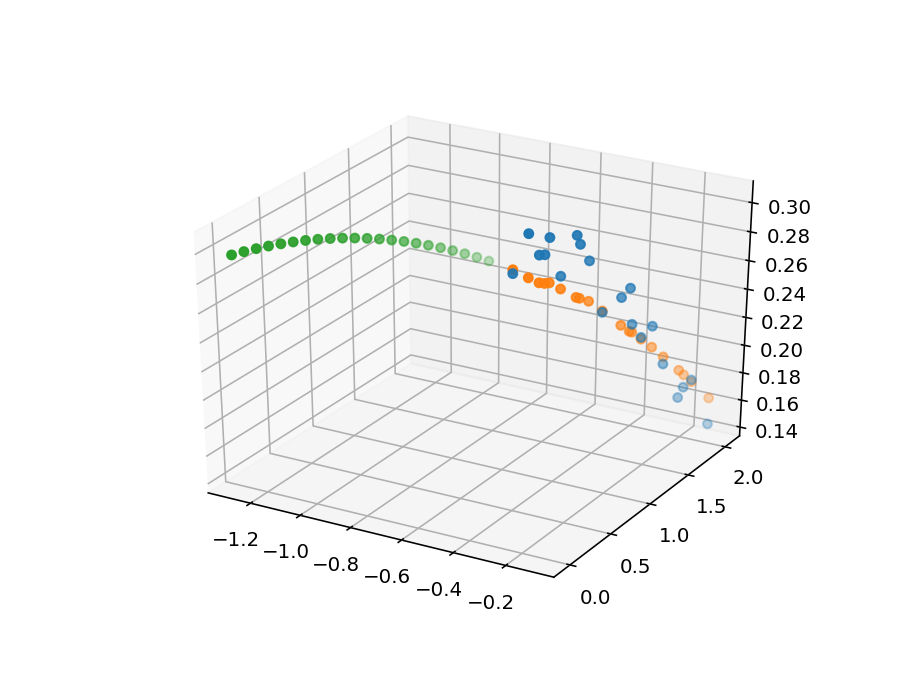

<IPython.core.display.Javascript object>


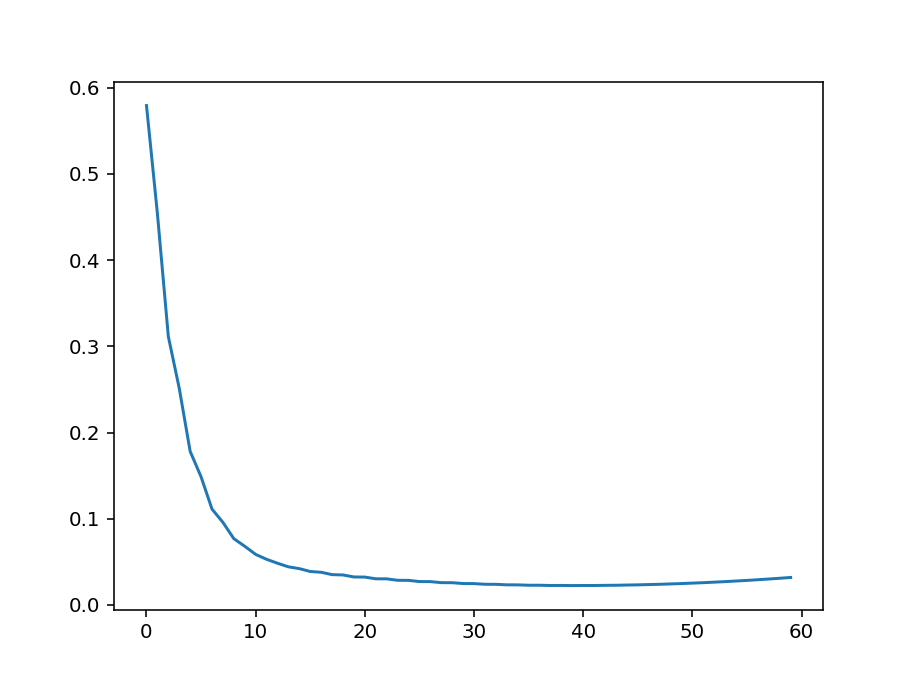

In [67]:
kick2 = import_dataset('kick2.dat')

learning_rate = 0.009
iterations = 60
W_scale=0.0009
regressaoPolinomial(kick2[:,:2], kick2[:,2], iterations, learning_rate, W_scale)

## Análises
&emsp;Define linear and polynomial regressions to learn your models, derive the equations, and implement a gradient
descent method from scratch\
&emsp;Train a linear and polynomial regression in each dataset\
&emsp;Evaluate the impact of the model complexity in the results (degree of the model)\
&emsp;Evaluate the impact of the learning rate (test at least 3 values) in the process\
&emsp;Plot the models learned to predict the trajectory (like Figure 2.1) along with the metrics used to evaluate them, discussing the results.